In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, OrdinalEncoder, SplineTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings("ignore")

from drive.MyDrive.Kaggle.Clustering_072022.src.functions import *

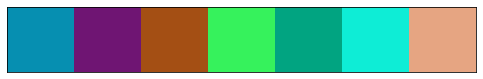

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#068fb1","#6f1573","#a44f14","#36f25c","#01a481", "#0eedd6", "#e6a582"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')

PATH = 'drive/MyDrive/Kaggle/Clustering_072022/'
data = pd.read_csv(PATH+'src/data_removed.csv', index_col='id')

cat_feats = data.columns[data.dtypes=='int'].tolist()
num_feats = data.columns[data.dtypes=='float'].tolist()

In [ ]:
ct = ColumnTransformer([('num_scaler', QuantileTransformer(), num_feats)], remainder='passthrough')
pipe = Pipeline([('num_scaling', ct), ('PT', PowerTransformer()), ('scaling', StandardScaler())])

In [ ]:
def my_boxplot(data, title, figsize=(20, 10)):
    tmp_df = pd.DataFrame(data = data, columns = data.columns.to_list())
    plt.figure(figsize=figsize) 
    sns.boxplot(x="variable", y="value", data=pd.melt(tmp_df)).set_title(f'Boxplot of each feature for {title}',size=15)
    plt.savefig(f'{title}')
    plt.show()

# Raw Features

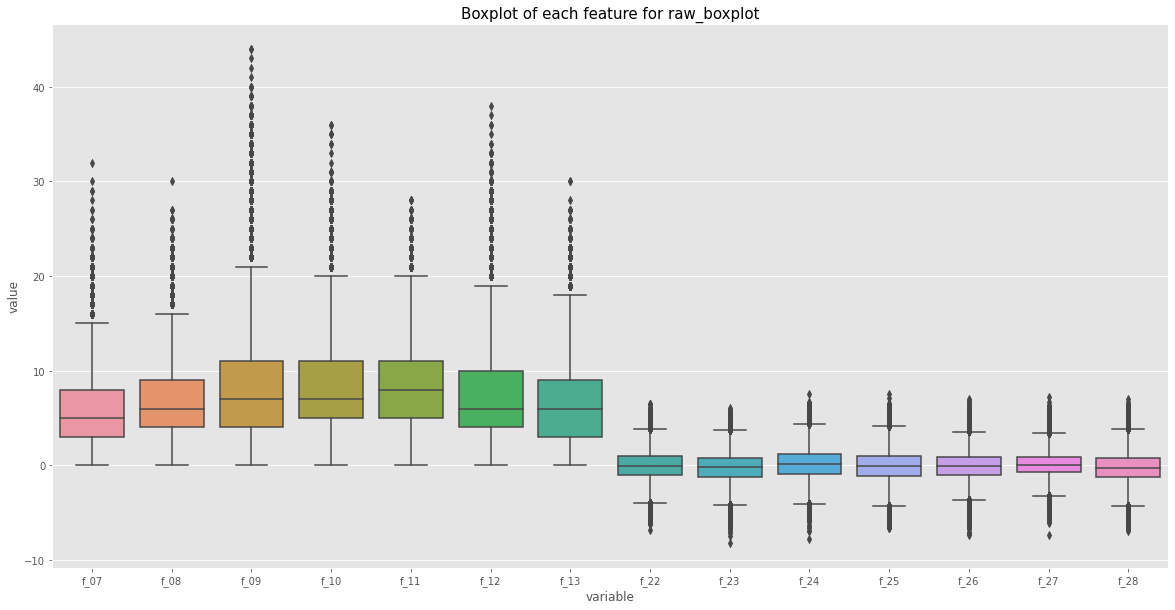

In [ ]:
my_boxplot(data, title='raw_boxplot')

# Power Transformed (all features)

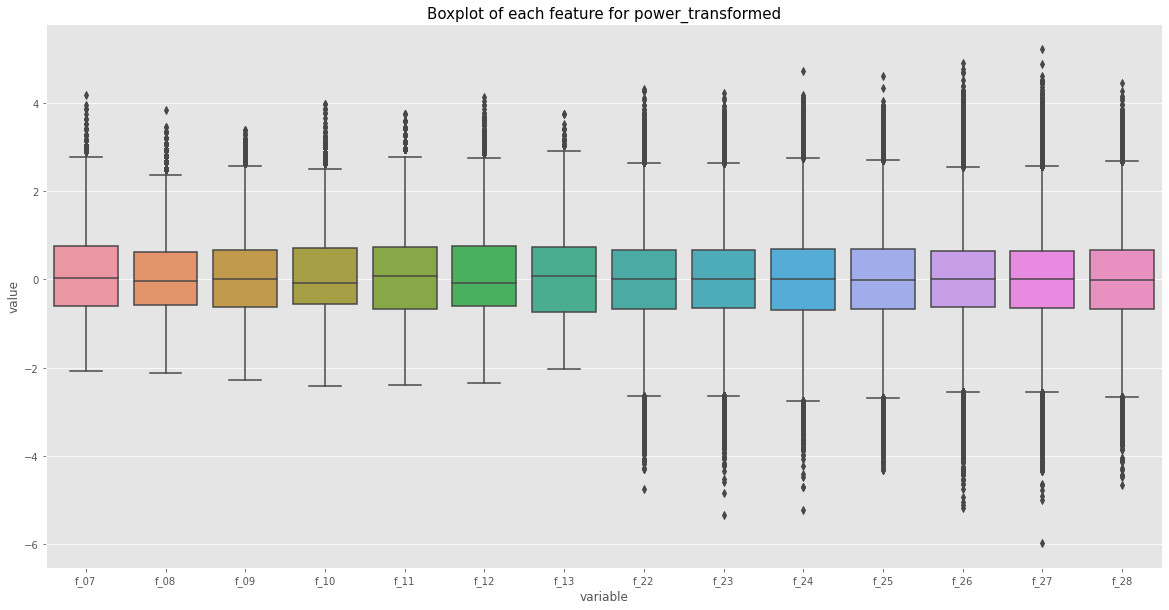

In [ ]:
my_boxplot(pd.DataFrame(PowerTransformer().fit_transform(data),columns=data.columns), 'power_transformed')

# All: PowerT then RobustScaler

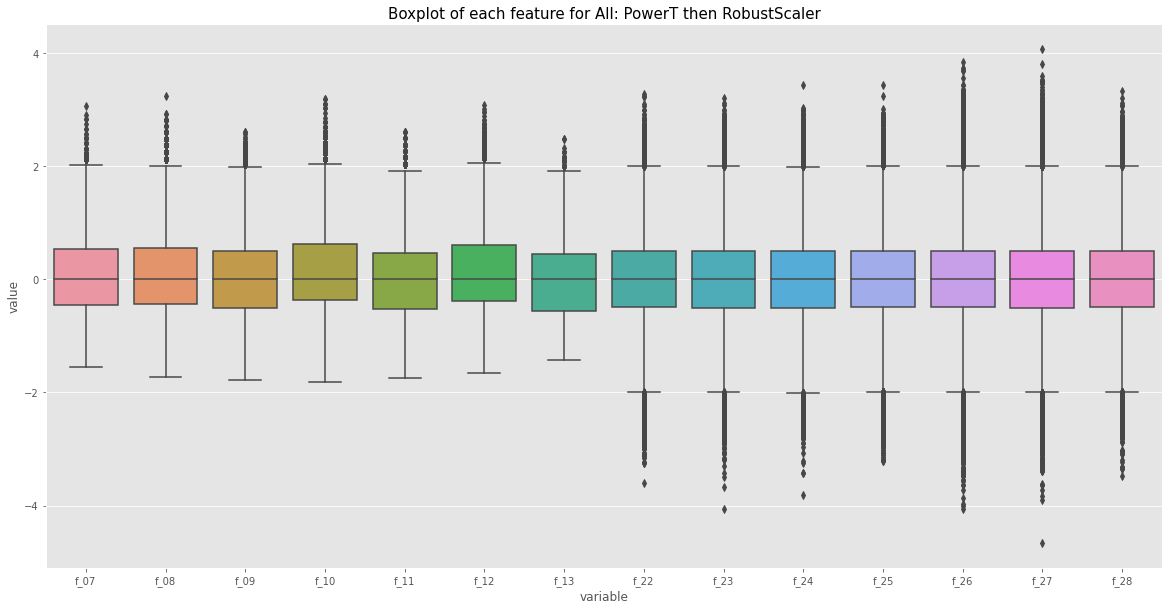

In [ ]:
df = data.copy()
df = pd.DataFrame(RobustScaler().fit_transform(PowerTransformer().fit_transform(df)), columns=df.columns)

my_boxplot(df, 'All: PowerT then RobustScaler')

# All RobustScaled then PowerT

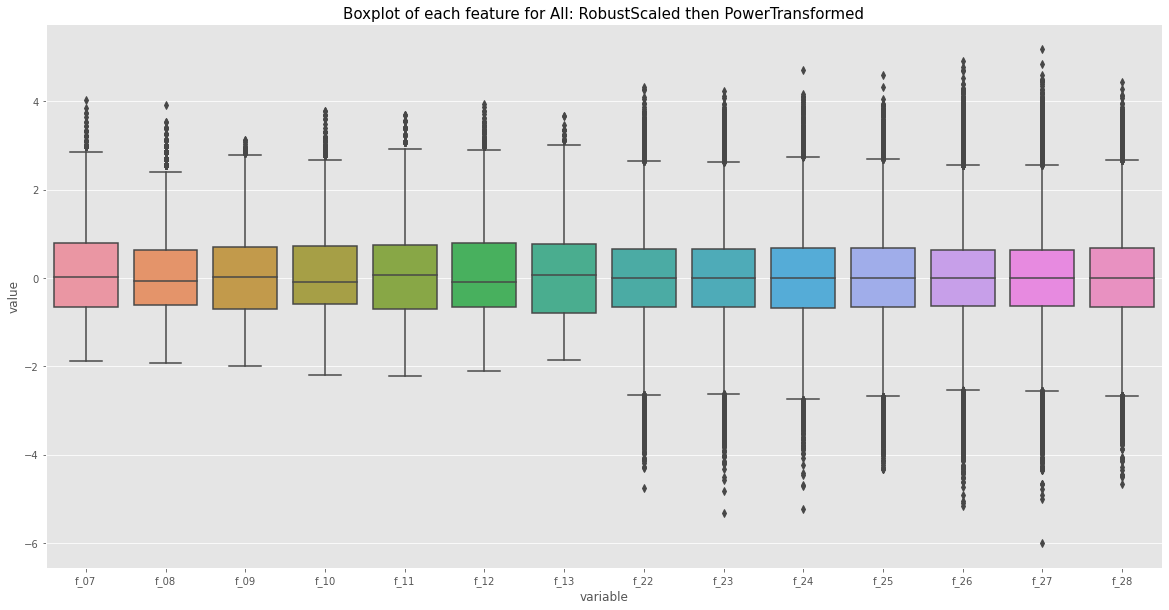

In [ ]:
df = data.copy()
df = pd.DataFrame(PowerTransformer().fit_transform(RobustScaler().fit_transform(df)), columns=df.columns)

my_boxplot(df, 'All: RobustScaled then PowerTransformed')

# Numeric Robust Scaled then all PowerTransformed

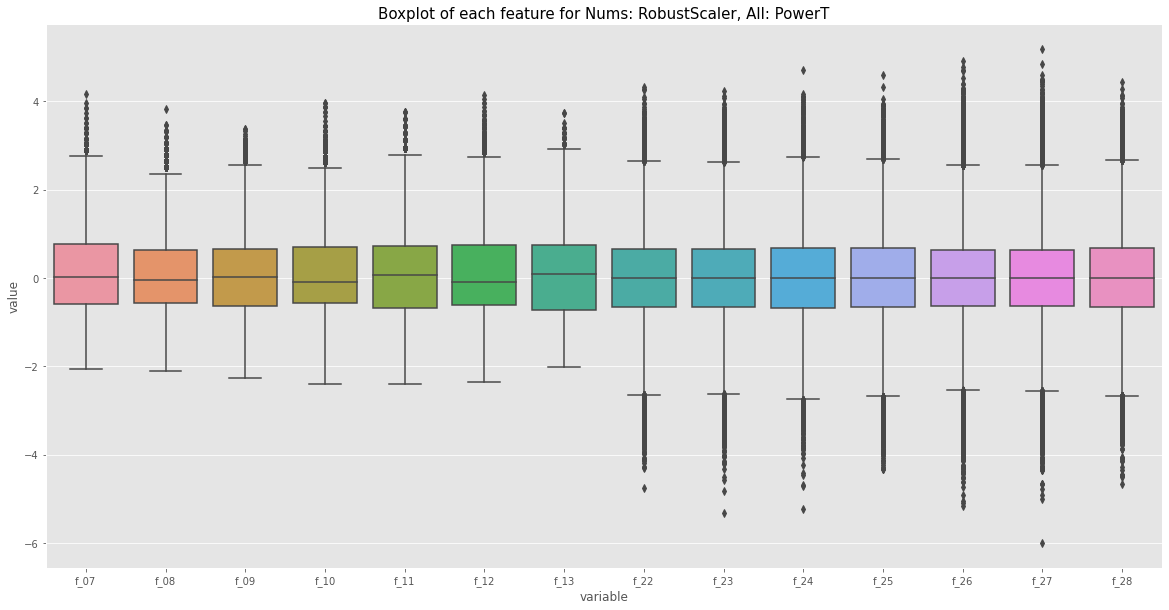

In [ ]:
df = data.copy()
df[num_feats] = RobustScaler().fit_transform(df[num_feats])
df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: RobustScaler, All: PowerT')

# Numeric Features Quantile Transformed then all Power Transformed

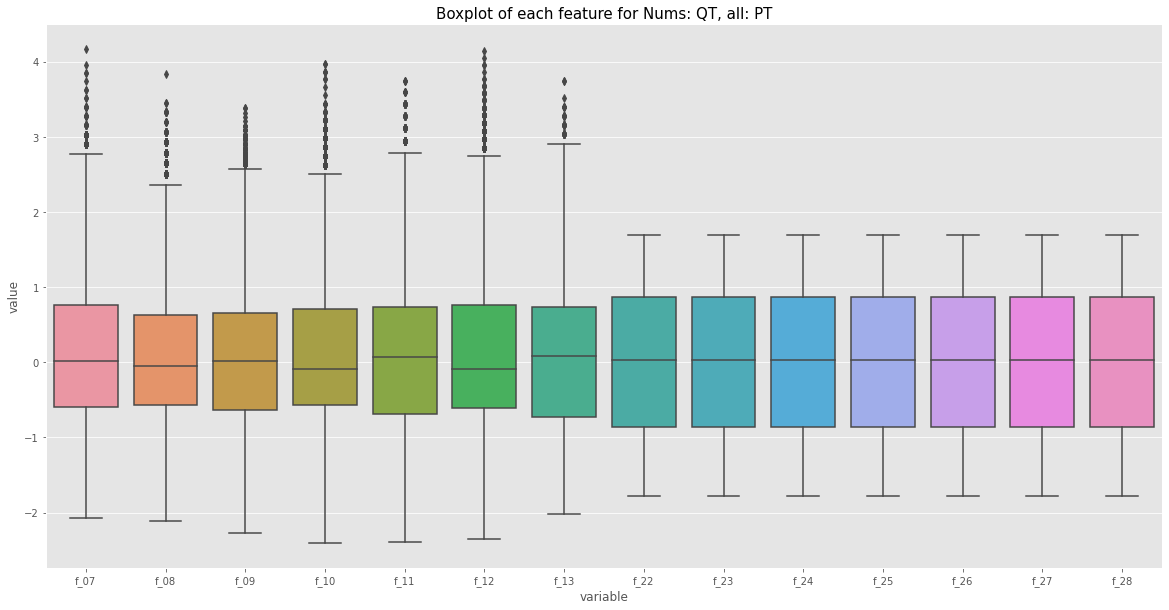

In [ ]:
df = data.copy()
df[num_feats] = QuantileTransformer().fit_transform(df[num_feats])
df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: QT, all: PT')

# Numeric QuantileT, all PowerT then all RobustScaled

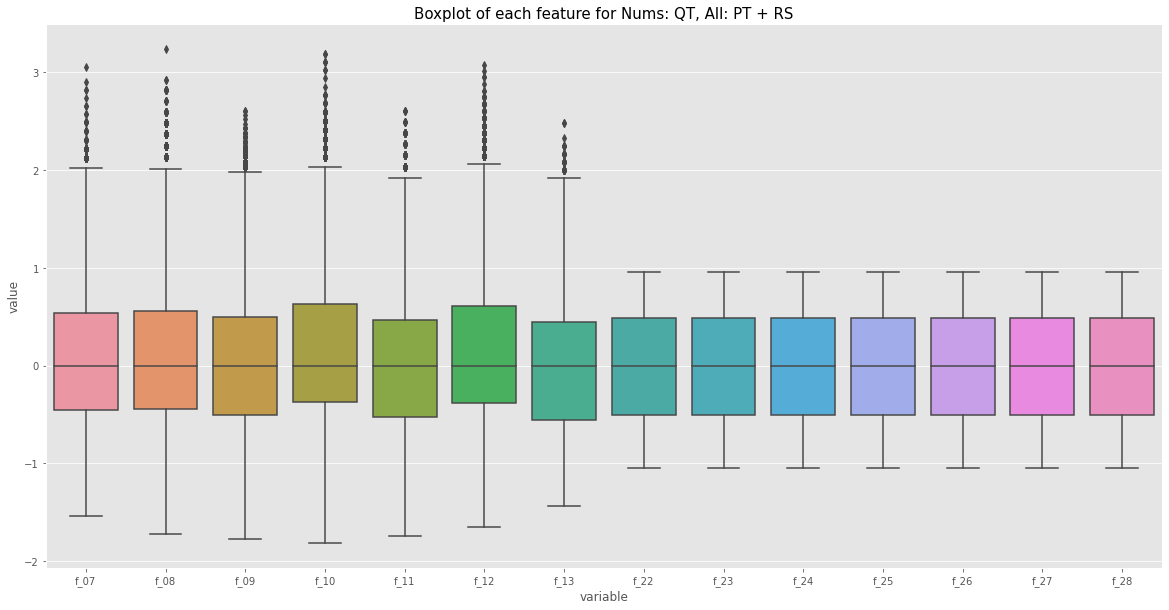

In [ ]:
df = data.copy()
df[num_feats] = QuantileTransformer().fit_transform(df[num_feats])
df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns)
df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: QT, All: PT + RS')

# Numeric QuantileT, Categorical PowerT, all RobustScaled

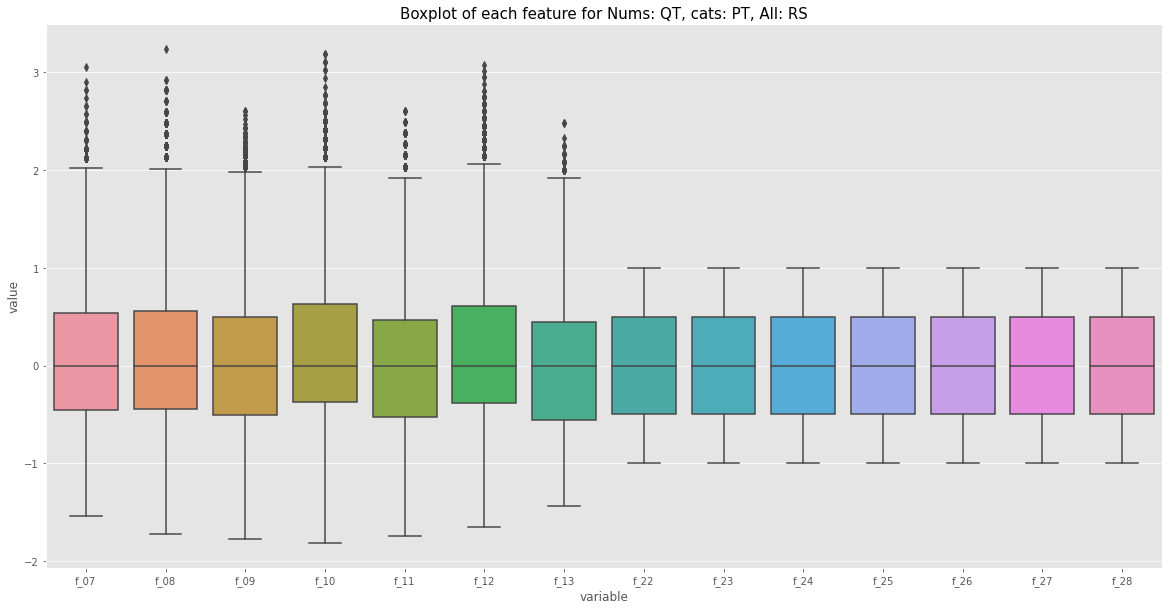

In [ ]:
df = data.copy()
df[num_feats] = QuantileTransformer().fit_transform(df[num_feats])
df[cat_feats] = PowerTransformer().fit_transform(df[cat_feats])
df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: QT, cats: PT, All: RS')

# Numeric QuantileT, Categroical PowerT, all MinMaxScaled

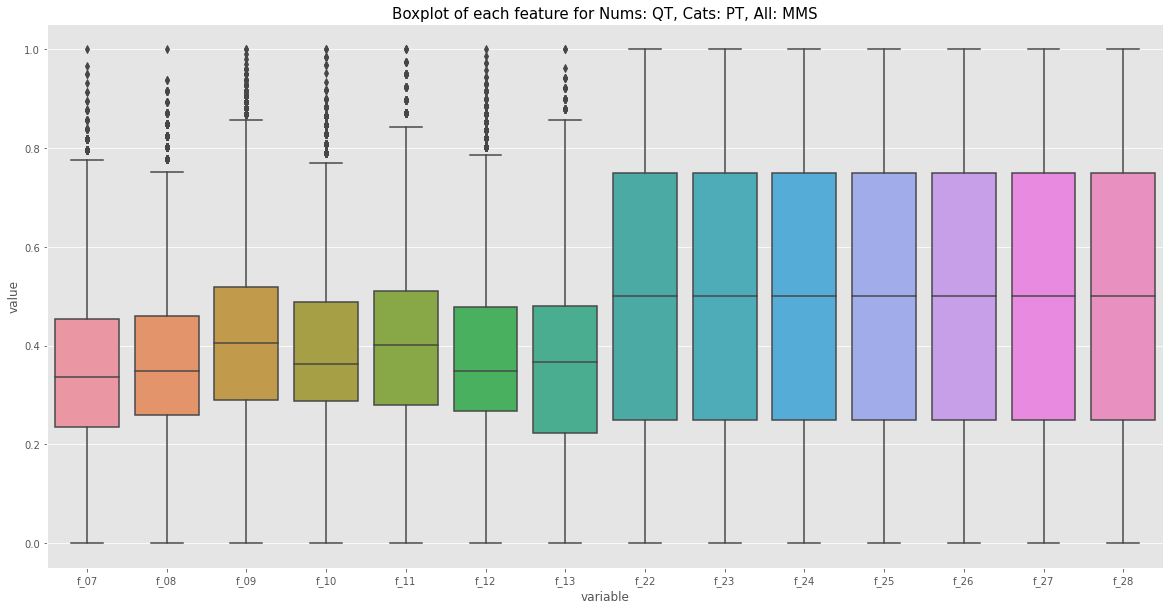

In [ ]:
df = data.copy()
df[num_feats] = QuantileTransformer().fit_transform(df[num_feats])
df[cat_feats] = PowerTransformer().fit_transform(df[cat_feats])
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: QT, Cats: PT, All: MMS')

# Numeric QuantileT, Categroical PowerT, all StandardScaled

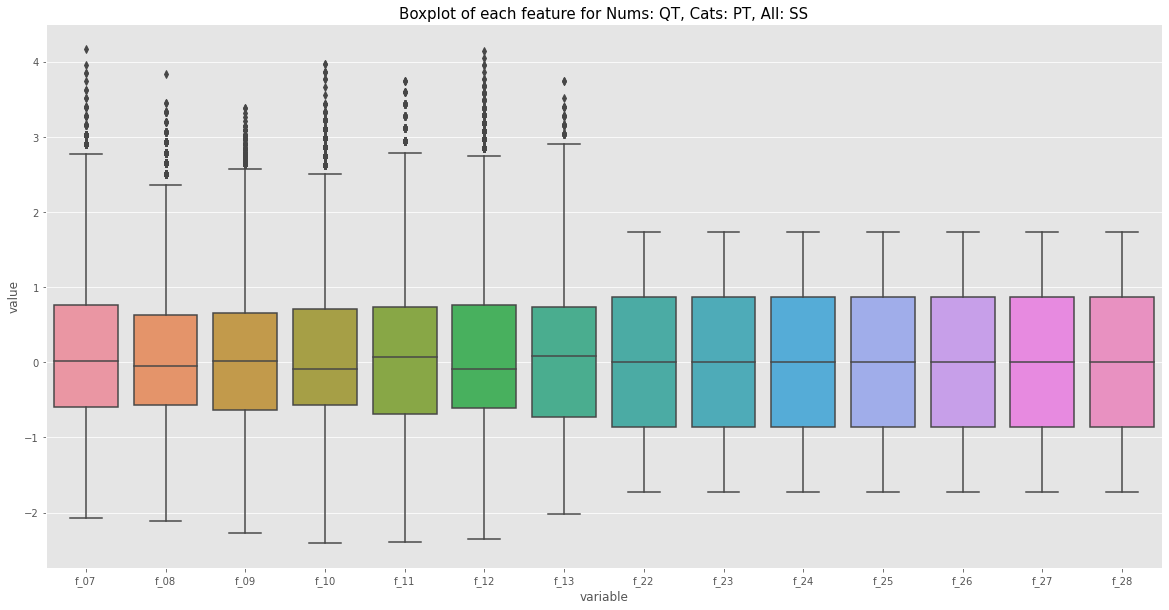

In [ ]:
df = data.copy()
df[num_feats] = QuantileTransformer().fit_transform(df[num_feats])
df[cat_feats] = PowerTransformer().fit_transform(df[cat_feats])
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: QT, Cats: PT, All: SS')

# Numeric QuantileT, Categroical PowerT, all MaxAbsScaled

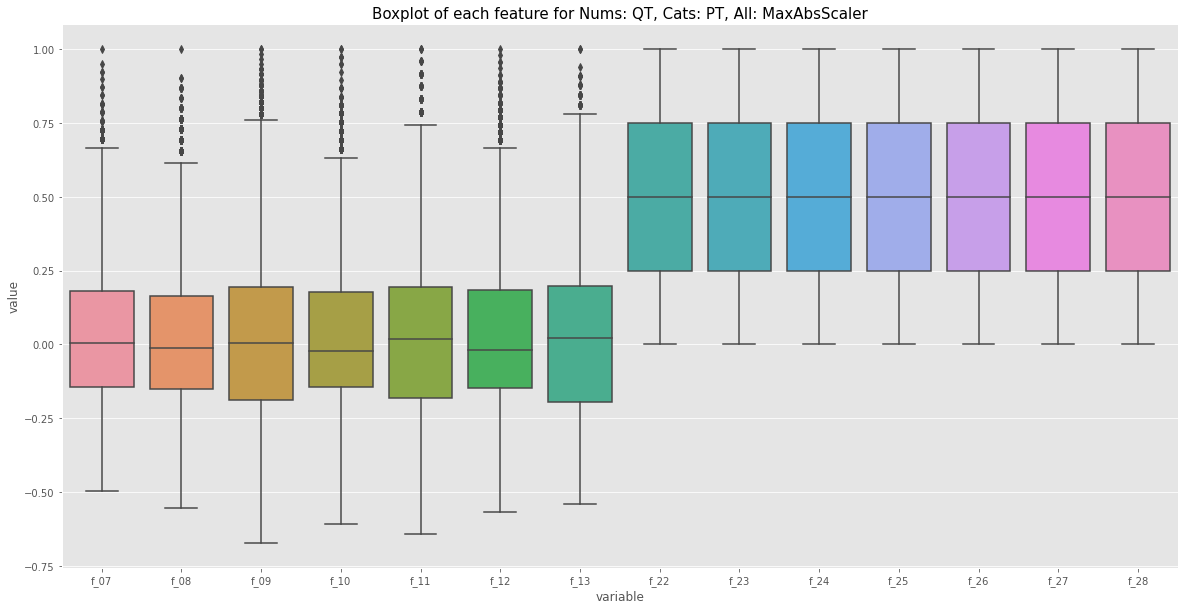

In [ ]:
df = data.copy()
df[num_feats] = QuantileTransformer().fit_transform(df[num_feats])
df[cat_feats] = PowerTransformer().fit_transform(df[cat_feats])
df = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)

my_boxplot(df, 'Nums: QT, Cats: PT, All: MaxAbsScaler')